In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('./data/municipios-13-22-cl.csv', encoding='cp850', skiprows=3, sep=';', skipfooter=12)
dados

C:\Users\pbitg\AppData\Local\Temp\ipykernel_42480\3280577715.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv('./data/municipios-13-22-cl.csv', encoding='cp850', skiprows=3, sep=';', skipfooter=12)


MunicÝpio    2013/Jan    2013/Fev    2013/Mar  \
0     110001 ALTA FLORESTA D'OESTE    54296.20    60965.89    64765.53   
1                 110002 ARIQUEMES   314442.36   229309.02   363374.06   
2                    110003 CABIXI     9001.16     7674.20     7712.90   
3                    110004 CACOAL   255876.64   299198.37   359003.89   
4                110005 CEREJEIRAS    44450.08    53261.84    50449.20   
...                            ...         ...         ...         ...   
3446    522185 VALPARAISO DE GOIAS         NaN         NaN         NaN   
3447             522200 VIANOPOLIS    36948.42    36023.45    35692.24   
3448         522205 VICENTINOPOLIS     3233.56     4100.05     5100.13   
3449               522220 VILA BOA     3725.66     1901.62     4100.70   
3450               530010 BRASILIA  6376321.72  6927022.27  5926473.96   

        2013/Abr    2013/Mai    2013/Jun    2013/Jul    2013/Ago    2013/Set  \
0       60049.78    58470.43    58904.72    60636.20    61192.05    63146.10   
1      319475.97   329931.82   265113.60   307992.87   401918.00   218744.87   
2        6845.91     6781.59     6903.89     7724.15     8907.74     7500.72   
3      355762.00   364587.30   374006.55   398416.71   380448.62   431110.07   
4       51282.47    49936.93    47915.65    33163.77    27581.86    39750.61   
...          ...         ...         ...         ...         ...         ...   
3446         NaN         NaN         NaN         NaN         NaN         NaN   
3447    39440.84    32822.52    33091.28    28674.83    38130.97    35302.91   
3448     5507.60     6227.17     7052.17     5897.66     7687.58     6159.08   
3449    10467.11    11622.94     9917.30     1935.95      568.45     2344.36   
3450  5728596.17  6871226.37  6116589.27  6433608.75  7042986.58  5283871.90   

      ...     2022/Abr     2022/Mai     2022/Jun     2022/Jul     2022/Ago  \
0     ...     43426.50     42682.45     51087.54     51620.61     35400.78   
1     ...    518379.37    520401.21    472279.77    517816.60    439836.82   
2     ...      3326.04      4454.34      3995.22      6247.00      7223.19   
3     ...   1201314.54    615367.14    847879.14    685349.44    906850.17   
4     ...     31546.00     34898.05     31431.73     38674.95     44759.29   
...   ...          ...          ...          ...          ...          ...   
3446  ...     70316.43     57372.98     58910.73     46464.99     56056.74   
3447  ...     23322.45     25592.80     27625.56     28157.65     26124.66   
3448  ...      9692.08      8182.01     13234.67      7632.93     12364.66   
3449  ...          NaN          NaN          NaN          NaN          NaN   
3450  ...  25430770.37  25487401.11  23294545.34  25729397.43  30312743.67   

         2022/Set     2022/Out     2022/Nov     2022/Dez         Total  
0        35484.65     43707.12     55265.43     70154.93  6.539565e+06  
1       498239.43    492509.92    443911.64    472371.84  5.764244e+07  
2         5521.07      6243.29      6999.95      5107.09  9.248790e+05  
3       739106.68    650801.74    805428.92    640570.50  9.339581e+07  
4        41989.53     43705.76     38040.90     31082.31  4.520314e+06  
...           ...          ...          ...          ...           ...  
3446     51676.87     39091.81     33419.25     38362.58  2.620419e+06  
3447     19636.61     22347.21     20479.54     12995.53  3.325284e+06  
3448      6647.13     12154.34      5640.58      9106.42  9.407299e+05  
3449          NaN          NaN          NaN          NaN  1.097971e+05  
3450  27630817.49  28363820.55  26501499.19  24624644.72  1.779810e+09  

[3451 rows x 122 columns]

In [3]:
print(type(dados))
print('---------')
print(dados.shape)
print('---------')
print(dados.dtypes)

<class 'pandas.core.frame.DataFrame'>
---------
(3451, 122)
---------
MunicÝpio     object
2013/Jan     float64
2013/Fev     float64
2013/Mar     float64
2013/Abr     float64
              ...   
2022/Set     float64
2022/Out     float64
2022/Nov     float64
2022/Dez     float64
Total        float64
Length: 122, dtype: object


In [4]:
# Renomear coluna do município
dados = dados.rename(columns={'MunicÝpio': 'municipio'})

# Tirar a coluna de total
dados.drop(columns =["Total"], inplace = True)

# Separar o código do IBGE em uma coluna separada para usá-lo como key
dados['cod_ibge'] = dados['municipio'].str.split(" ", n=1, expand = True)[0]
dados['municipio'] = dados['municipio'].str.split(" ", n=1, expand = True)[1]
dados.head(3)

municipio   2013/Jan   2013/Fev   2013/Mar   2013/Abr  \
0  ALTA FLORESTA D'OESTE   54296.20   60965.89   64765.53   60049.78   
1              ARIQUEMES  314442.36  229309.02  363374.06  319475.97   
2                 CABIXI    9001.16    7674.20    7712.90    6845.91   

    2013/Mai   2013/Jun   2013/Jul   2013/Ago   2013/Set  ...   2022/Abr  \
0   58470.43   58904.72   60636.20   61192.05   63146.10  ...   43426.50   
1  329931.82  265113.60  307992.87  401918.00  218744.87  ...  518379.37   
2    6781.59    6903.89    7724.15    8907.74    7500.72  ...    3326.04   

    2022/Mai   2022/Jun   2022/Jul   2022/Ago   2022/Set   2022/Out  \
0   42682.45   51087.54   51620.61   35400.78   35484.65   43707.12   
1  520401.21  472279.77  517816.60  439836.82  498239.43  492509.92   
2    4454.34    3995.22    6247.00    7223.19    5521.07    6243.29   

    2022/Nov   2022/Dez  cod_ibge  
0   55265.43   70154.93    110001  
1  443911.64  472371.84    110002  
2    6999.95    5107.09    110003  

[3 rows x 122 columns]

In [5]:
# Transformar para formato longo, mais fácil para o computador ler
formato_longo = dados.melt(id_vars=['cod_ibge', 'municipio'], 
                   var_name='competencia', 
                   value_name='valor').dropna()
formato_longo

cod_ibge              municipio competencia        valor
0        110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20
1        110002              ARIQUEMES    2013/Jan    314442.36
2        110003                 CABIXI    2013/Jan      9001.16
3        110004                 CACOAL    2013/Jan    255876.64
4        110005             CEREJEIRAS    2013/Jan     44450.08
...         ...                    ...         ...          ...
414114   522170                 URUANA    2022/Dez     13206.10
414115   522185    VALPARAISO DE GOIAS    2022/Dez     38362.58
414116   522200             VIANOPOLIS    2022/Dez     12995.53
414117   522205         VICENTINOPOLIS    2022/Dez      9106.42
414119   530010               BRASILIA    2022/Dez  24624644.72

[365753 rows x 4 columns]

In [6]:
# Transformar o código do IBGE em número (estava como objeto)
formato_longo["cod_ibge"] = pd.to_numeric(formato_longo["cod_ibge"])
formato_longo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365753 entries, 0 to 414119
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cod_ibge     365753 non-null  int64  
 1   municipio    365753 non-null  object 
 2   competencia  365753 non-null  object 
 3   valor        365753 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.0+ MB


In [7]:
regioes = pd.DataFrame([
                        ['1', 'norte', 'N'], 
                        ['2', 'nordeste', 'NE'], 
                        ['3', 'sudeste', 'SE'], 
                        ['4', 'sul', 'S'], 
                        ['5', 'centro-oeste', 'CE']],
                        columns=['cod_regiao', 'regiao', 'regiao_sigla'])
regioes

cod_regiao        regiao regiao_sigla
0          1         norte            N
1          2      nordeste           NE
2          3       sudeste           SE
3          4           sul            S
4          5  centro-oeste           CE

In [8]:
regioes['cod_regiao'] = pd.to_numeric(regioes['cod_regiao'])
regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_regiao    5 non-null      int64 
 1   regiao        5 non-null      object
 2   regiao_sigla  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [9]:
# Pegar o primeiro algarismo do código do IBGE (divisão exata)
formato_longo['cod_regiao'] = formato_longo['cod_ibge'] // 100000
formato_longo

cod_ibge              municipio competencia        valor  cod_regiao
0         110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20           1
1         110002              ARIQUEMES    2013/Jan    314442.36           1
2         110003                 CABIXI    2013/Jan      9001.16           1
3         110004                 CACOAL    2013/Jan    255876.64           1
4         110005             CEREJEIRAS    2013/Jan     44450.08           1
...          ...                    ...         ...          ...         ...
414114    522170                 URUANA    2022/Dez     13206.10           5
414115    522185    VALPARAISO DE GOIAS    2022/Dez     38362.58           5
414116    522200             VIANOPOLIS    2022/Dez     12995.53           5
414117    522205         VICENTINOPOLIS    2022/Dez      9106.42           5
414119    530010               BRASILIA    2022/Dez  24624644.72           5

[365753 rows x 5 columns]

In [10]:
# Incluir a região do município
formato_longo = pd.merge(formato_longo, regioes, how='left', on='cod_regiao')
formato_longo

cod_ibge              municipio competencia        valor  cod_regiao  \
0         110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20           1   
1         110002              ARIQUEMES    2013/Jan    314442.36           1   
2         110003                 CABIXI    2013/Jan      9001.16           1   
3         110004                 CACOAL    2013/Jan    255876.64           1   
4         110005             CEREJEIRAS    2013/Jan     44450.08           1   
...          ...                    ...         ...          ...         ...   
365748    522170                 URUANA    2022/Dez     13206.10           5   
365749    522185    VALPARAISO DE GOIAS    2022/Dez     38362.58           5   
365750    522200             VIANOPOLIS    2022/Dez     12995.53           5   
365751    522205         VICENTINOPOLIS    2022/Dez      9106.42           5   
365752    530010               BRASILIA    2022/Dez  24624644.72           5   

              regiao regiao_sigla  
0              norte            N  
1              norte            N  
2              norte            N  
3              norte            N  
4              norte            N  
...              ...          ...  
365748  centro-oeste           CE  
365749  centro-oeste           CE  
365750  centro-oeste           CE  
365751  centro-oeste           CE  
365752  centro-oeste           CE  

[365753 rows x 7 columns]

In [11]:
# Pacote para ler arquivo excel
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
cod_est = pd.read_excel('./data/RELATORIO_DTB_BRASIL_MUNICIPIO.xls', skiprows=6)
cod_est.shape

(5570, 14)

In [13]:
cod_est.columns

Index(['UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'Código Município Completo', 'Código Município 2',
       'Nome_Município'],
      dtype='object')

In [14]:
# Renomear e filtrar colunas
cod_est = cod_est.rename(columns={'Código Município 2': 'cod_ibge'})
cod_est = cod_est[['cod_ibge', 'Nome_UF']]
cod_est

cod_ibge           Nome_UF
0       110001          Rondônia
1       110037          Rondônia
2       110040          Rondônia
3       110034          Rondônia
4       110002          Rondônia
...        ...               ...
5565    522200             Goiás
5566    522205             Goiás
5567    522220             Goiás
5568    522230             Goiás
5569    530010  Distrito Federal

[5570 rows x 2 columns]

In [15]:
# Verificar se o tipo de dado do código IBGE é igual em dados e em cod_est
cod_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cod_ibge  5570 non-null   int64 
 1   Nome_UF   5570 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [16]:
# Incluir o nome do estado no df
formato_longo = pd.merge(formato_longo, cod_est, how='left', on='cod_ibge')
formato_longo

cod_ibge              municipio competencia        valor  cod_regiao  \
0         110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20           1   
1         110002              ARIQUEMES    2013/Jan    314442.36           1   
2         110003                 CABIXI    2013/Jan      9001.16           1   
3         110004                 CACOAL    2013/Jan    255876.64           1   
4         110005             CEREJEIRAS    2013/Jan     44450.08           1   
...          ...                    ...         ...          ...         ...   
365748    522170                 URUANA    2022/Dez     13206.10           5   
365749    522185    VALPARAISO DE GOIAS    2022/Dez     38362.58           5   
365750    522200             VIANOPOLIS    2022/Dez     12995.53           5   
365751    522205         VICENTINOPOLIS    2022/Dez      9106.42           5   
365752    530010               BRASILIA    2022/Dez  24624644.72           5   

              regiao regiao_sigla           Nome_UF  
0              norte            N          Rondônia  
1              norte            N          Rondônia  
2              norte            N          Rondônia  
3              norte            N          Rondônia  
4              norte            N          Rondônia  
...              ...          ...               ...  
365748  centro-oeste           CE             Goiás  
365749  centro-oeste           CE             Goiás  
365750  centro-oeste           CE             Goiás  
365751  centro-oeste           CE             Goiás  
365752  centro-oeste           CE  Distrito Federal  

[365753 rows x 8 columns]

In [17]:
formato_longo.columns

Index(['cod_ibge', 'municipio', 'competencia', 'valor', 'cod_regiao', 'regiao',
       'regiao_sigla', 'Nome_UF'],
      dtype='object')

In [19]:
# Separar a competência em mês e ano
formato_longo['ano'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[0]
formato_longo['mes'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[1]
formato_longo

cod_ibge              municipio competencia        valor  cod_regiao  \
0         110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20           1   
1         110002              ARIQUEMES    2013/Jan    314442.36           1   
2         110003                 CABIXI    2013/Jan      9001.16           1   
3         110004                 CACOAL    2013/Jan    255876.64           1   
4         110005             CEREJEIRAS    2013/Jan     44450.08           1   
...          ...                    ...         ...          ...         ...   
365748    522170                 URUANA    2022/Dez     13206.10           5   
365749    522185    VALPARAISO DE GOIAS    2022/Dez     38362.58           5   
365750    522200             VIANOPOLIS    2022/Dez     12995.53           5   
365751    522205         VICENTINOPOLIS    2022/Dez      9106.42           5   
365752    530010               BRASILIA    2022/Dez  24624644.72           5   

              regiao regiao_sigla           Nome_UF   ano  mes  
0              norte            N          Rondônia  2013  Jan  
1              norte            N          Rondônia  2013  Jan  
2              norte            N          Rondônia  2013  Jan  
3              norte            N          Rondônia  2013  Jan  
4              norte            N          Rondônia  2013  Jan  
...              ...          ...               ...   ...  ...  
365748  centro-oeste           CE             Goiás  2022  Dez  
365749  centro-oeste           CE             Goiás  2022  Dez  
365750  centro-oeste           CE             Goiás  2022  Dez  
365751  centro-oeste           CE             Goiás  2022  Dez  
365752  centro-oeste           CE  Distrito Federal  2022  Dez  

[365753 rows x 10 columns]

In [21]:
formato_longo.columns

Index(['cod_ibge', 'municipio', 'competencia', 'valor', 'cod_regiao', 'regiao',
       'regiao_sigla', 'Nome_UF', 'ano', 'mes'],
      dtype='object')

In [22]:
formato_longo = formato_longo.rename(columns={'Nome_UF': 'uf'})
formato_longo

cod_ibge              municipio competencia        valor  cod_regiao  \
0         110001  ALTA FLORESTA D'OESTE    2013/Jan     54296.20           1   
1         110002              ARIQUEMES    2013/Jan    314442.36           1   
2         110003                 CABIXI    2013/Jan      9001.16           1   
3         110004                 CACOAL    2013/Jan    255876.64           1   
4         110005             CEREJEIRAS    2013/Jan     44450.08           1   
...          ...                    ...         ...          ...         ...   
365748    522170                 URUANA    2022/Dez     13206.10           5   
365749    522185    VALPARAISO DE GOIAS    2022/Dez     38362.58           5   
365750    522200             VIANOPOLIS    2022/Dez     12995.53           5   
365751    522205         VICENTINOPOLIS    2022/Dez      9106.42           5   
365752    530010               BRASILIA    2022/Dez  24624644.72           5   

              regiao regiao_sigla                uf   ano  mes  
0              norte            N          Rondônia  2013  Jan  
1              norte            N          Rondônia  2013  Jan  
2              norte            N          Rondônia  2013  Jan  
3              norte            N          Rondônia  2013  Jan  
4              norte            N          Rondônia  2013  Jan  
...              ...          ...               ...   ...  ...  
365748  centro-oeste           CE             Goiás  2022  Dez  
365749  centro-oeste           CE             Goiás  2022  Dez  
365750  centro-oeste           CE             Goiás  2022  Dez  
365751  centro-oeste           CE             Goiás  2022  Dez  
365752  centro-oeste           CE  Distrito Federal  2022  Dez  

[365753 rows x 10 columns]

In [127]:
df = formato_longo[['cod_ibge', 'regiao', 'regiao_sigla', 'uf', 'municipio', 'ano', 'mes', 'valor', 'competencia']]
df

cod_ibge        regiao regiao_sigla                uf  \
0         110001         norte            N          Rondônia   
1         110002         norte            N          Rondônia   
2         110003         norte            N          Rondônia   
3         110004         norte            N          Rondônia   
4         110005         norte            N          Rondônia   
...          ...           ...          ...               ...   
365748    522170  centro-oeste           CE             Goiás   
365749    522185  centro-oeste           CE             Goiás   
365750    522200  centro-oeste           CE             Goiás   
365751    522205  centro-oeste           CE             Goiás   
365752    530010  centro-oeste           CE  Distrito Federal   

                    municipio   ano  mes        valor competencia  
0       ALTA FLORESTA D'OESTE  2013  Jan     54296.20    2013/Jan  
1                   ARIQUEMES  2013  Jan    314442.36    2013/Jan  
2                      CABIXI  2013  Jan      9001.16    2013/Jan  
3                      CACOAL  2013  Jan    255876.64    2013/Jan  
4                  CEREJEIRAS  2013  Jan     44450.08    2013/Jan  
...                       ...   ...  ...          ...         ...  
365748                 URUANA  2022  Dez     13206.10    2022/Dez  
365749    VALPARAISO DE GOIAS  2022  Dez     38362.58    2022/Dez  
365750             VIANOPOLIS  2022  Dez     12995.53    2022/Dez  
365751         VICENTINOPOLIS  2022  Dez      9106.42    2022/Dez  
365752               BRASILIA  2022  Dez  24624644.72    2022/Dez  

[365753 rows x 9 columns]

In [ ]:
# from datetime import datetime

# # Data em formato de texto
# data_texto = "2013/Jan"

# # Dicionário para mapear nomes de meses para números
# meses = {
#     'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4,
#     'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
#     'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12
# }

# # Divida a data em ano e mês
# ano, mes_nome = data_texto.split('/')

# # Converta o mês para um número usando o dicionário
# mes_numero = meses.get(mes_nome)

# if mes_numero is not None:
#     # Crie um objeto datetime
#     data = datetime(int(ano), mes_numero, 1)
#     print(data)

In [105]:
# df[data] = pd.to_datetime(df['data'])
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365753 entries, 0 to 365752
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cod_ibge      365753 non-null  int64  
 1   regiao        365753 non-null  object 
 2   regiao_sigla  365753 non-null  object 
 3   uf            365753 non-null  object 
 4   municipio     365753 non-null  object 
 5   ano           365753 non-null  object 
 6   mes           365753 non-null  object 
 7   valor         365753 non-null  float64
 8   competencia   365753 non-null  object 
 9   data          365753 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 27.9+ MB


In [119]:
regiao = df[['regiao', 'regiao_sigla', 'ano', 'valor']]

# Agrupar por ano
grouped_regiao = regiao.groupby(['regiao', 'ano'])
grouped_regiao.sum('valor')

valor
regiao       ano               
centro-oeste 2013  7.785496e+08
             2014  8.113606e+08
             2015  8.450829e+08
             2016  8.666587e+08
             2017  8.916243e+08
             2018  1.032956e+09
             2019  1.086458e+09
             2020  1.169999e+09
             2021  1.709111e+09
             2022  1.356911e+09
nordeste     2013  2.926065e+09
             2014  3.073250e+09
             2015  3.190978e+09
             2016  3.265072e+09
             2017  3.404029e+09
             2018  3.535150e+09
             2019  3.701739e+09
             2020  3.795538e+09
             2021  5.234641e+09
             2022  4.451427e+09
norte        2013  7.045907e+08
             2014  7.114360e+08
             2015  7.535184e+08
             2016  7.664885e+08
             2017  8.087566e+08
             2018  8.451205e+08
             2019  8.898891e+08
             2020  9.651769e+08
             2021  1.224762e+09
             2022  1.130223e+09
sudeste      2013  5.612230e+09
             2014  5.945924e+09
             2015  6.042135e+09
             2016  6.050257e+09
             2017  6.242423e+09
             2018  6.453819e+09
             2019  6.753618e+09
             2020  7.104092e+09
             2021  9.682945e+09
             2022  8.236907e+09
sul          2013  2.564618e+09
             2014  2.715166e+09
             2015  2.843216e+09
             2016  2.935111e+09
             2017  3.063236e+09
             2018  3.239343e+09
             2019  3.384346e+09
             2020  3.350716e+09
             2021  4.522212e+09
             2022  3.899801e+09

In [51]:
# Separar os DF por região
df_n = df[(df['regiao'] == 'norte')]
df_ne = df[(df['regiao'] == 'nordeste')]
df_se = df[(df['regiao'] == 'sudeste')]
df_s = df[(df['regiao'] == 'sul')]
df_ce = df[(df['regiao'] == 'centro-oeste')]

In [52]:
print(df_n.shape)
print(df_ne.shape)
print(df_se.shape)
print(df_s.shape)
print(df_ce.shape)

(33345, 10)
(125168, 10)
(98291, 10)
(72064, 10)
(36885, 10)


# 📊 Gráficos 📈

In [27]:
!pip install matplotlib
!pip install --upgrade seaborn --quiet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


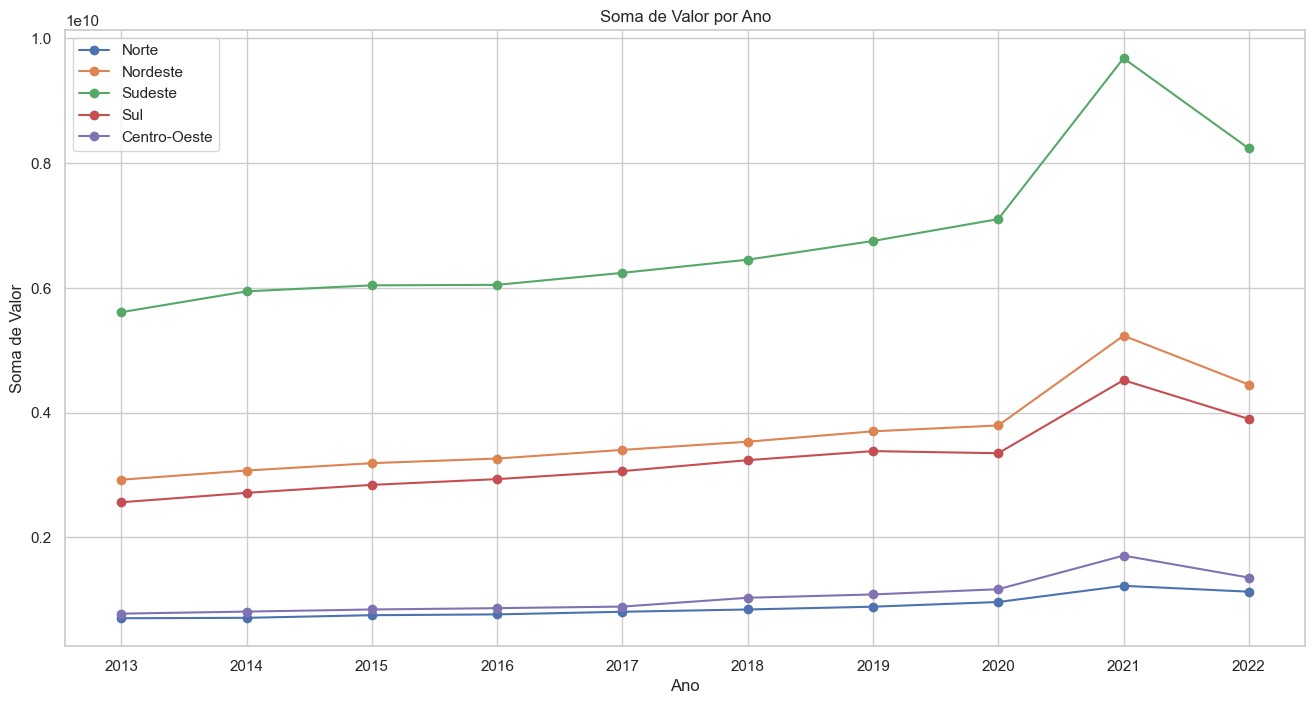

In [135]:
# Criar um espaço maior para plotar o gráfico
plt.figure(figsize=(16, 8))

# Agrupar os dados por ano e somar os valores
soma_por_ano_n = df_n.groupby('ano')['valor'].sum()
soma_por_ano_ne = df_ne.groupby('ano')['valor'].sum()
soma_por_ano_se = df_se.groupby('ano')['valor'].sum()
soma_por_ano_s = df_s.groupby('ano')['valor'].sum()
soma_por_ano_ce = df_ce.groupby('ano')['valor'].sum()

# Criar o gráfico de linha
plt.plot(soma_por_ano_n.index, soma_por_ano_n.values, marker='o', linestyle='-', label = 'Norte')
plt.plot(soma_por_ano_ne.index, soma_por_ano_ne.values, marker='o', linestyle='-', label = 'Nordeste')
plt.plot(soma_por_ano_se.index, soma_por_ano_se.values, marker='o', linestyle='-', label = 'Sudeste')
plt.plot(soma_por_ano_s.index, soma_por_ano_s.values, marker='o', linestyle='-', label = 'Sul')
plt.plot(soma_por_ano_ce.index, soma_por_ano_ce.values, marker='o', linestyle='-', label = 'Centro-Oeste')

# Adicionar rótulos aos eixos x e y
plt.xlabel('Ano')
plt.ylabel('Soma de Valor')

# Adicionar um título ao gráfico
plt.title('Soma de Valor por Ano')

# Exibir o gráfico
plt.grid(True)  # Adicione uma grade ao gráfico
plt.legend()
plt.show()

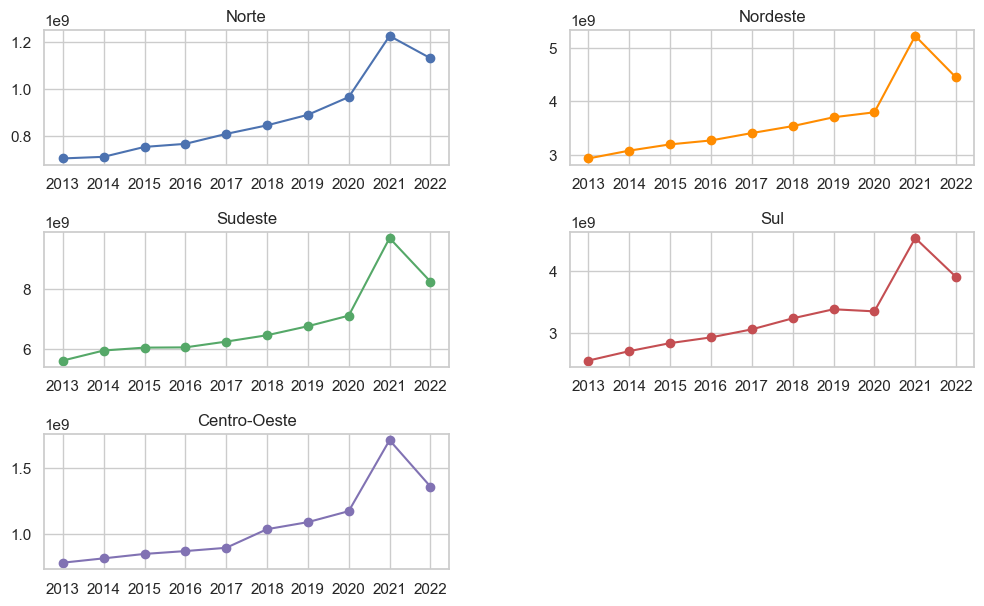

In [163]:
# Criar um gráfico para cada região
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

ax1.plot(soma_por_ano_n.index, soma_por_ano_n.values, marker='o', linestyle='-')
ax2.plot(soma_por_ano_ne.index, soma_por_ano_ne.values, marker='o', linestyle='-', c='darkorange')
ax3.plot(soma_por_ano_se.index, soma_por_ano_se.values, marker='o', linestyle='-', c='g')
ax4.plot(soma_por_ano_s.index, soma_por_ano_s.values, marker='o', linestyle='-', c='r')
ax5.plot(soma_por_ano_ce.index, soma_por_ano_ce.values, marker='o', linestyle='-', c='m')

ax1.set_title('Norte')
ax2.set_title('Nordeste')
ax3.set_title('Sudeste')
ax4.set_title('Sul')
ax5.set_title('Centro-Oeste')

plt.subplots_adjust(wspace=0.3,hspace=0.5)

plt.show()